## Task 2.5 : Computing KDTree
### Subtask 1 : Construct and plot of the data in data2-train.dat where k = 2.
- 2 Variants on selecting slicing dimension
    1. alternate between the x and the y dimension
    2. split the data along the dimension of higher variance
- 3 Variants on computing sliping points
    1. split at the median of the data
    2. split at the midpoint of the data
    3. split at the midpoint of the data with sliding (S. Maneewongvatana and David M. Mount, 1999)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import pattrex.plotting_mpl as plt_rex
import pattrex.kdTreeCK as kd_rex
import pattrex.preprocessing as pre_rex

In [28]:
dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string

data = np.loadtxt('data/data2-train.dat', dtype=dt, comments='#', delimiter=None)

x = np.array([d[0] for d in data])#x
y = np.array([d[1] for d in data])#y
lable = np.array([d[2] for d in data])#label

X = np.vstack((x, y, lable))  # data is going to be column-wise
X.shape
X_pos, X_neg = pre_rex.split_data(X, True, 2, [1.0, -1.0])
# print("Positive :", X_pos.shape[1], "; Negative :", X_neg.shape[1])

In [29]:
# # plotting
# fig = plt.figure()
# axs = fig.add_subplot(111)

# # limits for the axes
# X_ = np.vstack((x, y))  # only the measurements; data is col-wise
# xmin, ymin = X_.min(axis=1)
# xmax, ymax = X_.max(axis=1)

# xlim = [xmin-25, xmax+25]  # purely for looks
# ylim = [ymin-25, ymax+25]

# plt_rex.plot2d(X_pos, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
#               show=False, axs=axs, set_aspect_equal=False, plotlabel="positive")
# plt_rex.plot2d(X_neg, colwise_data=True, hatch='ro', x_lim=xlim, 
#                y_lim=ylim, show=False, axs=axs, set_aspect_equal=False, 
#                plotlabel="negtive", title="Train Data")

In [30]:
TreeList=[]
dim, splt = 2,3
for i in range(dim):
    for j in range(splt):
        #print("dim,splt",dim, splt)
        TreeList.append(kd_rex.KDTree(X[0:2,:].T,0,i,j))


<IPython.core.display.Javascript object>


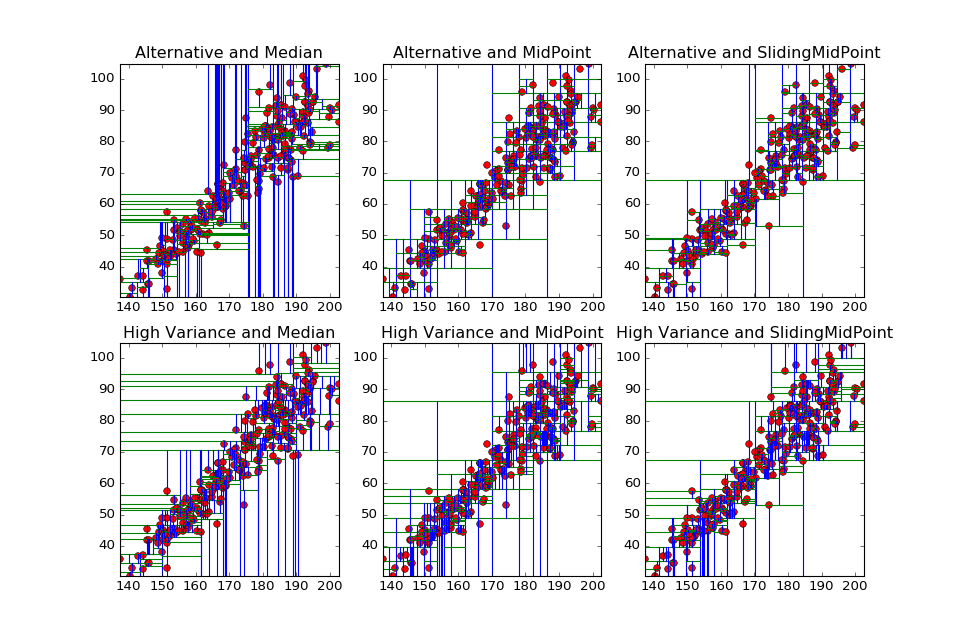

In [26]:
kd_rex.KDTreePlot2D(x,y,TreeList,dim,splt)

### Subtask 2: Determine overall run time for computing the 1-nearest neighbor of every data in data2-test.dat
- Use the bult-in function provided by Scipy

In [12]:
import scipy.spatial as ss
import timeit

In [17]:
#data2-test
dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string
data = np.loadtxt('data/data2-test.dat', dtype=dt, comments='#', delimiter=None)

x_t = np.array([d[0] for d in data])#x
y_t = np.array([d[1] for d in data])#y
lable_t = np.array([d[2] for d in data])#label

X_t = np.vstack((x_t, y_t, lable_t))  # data is going to be column-wise
X_t.shape

# split
X_t_pos, X_t_neg = pre_rex.split_data(X_t, True, 2, [1.0, -1.0])
print("Positive :", X_t_pos.shape[1], "; Negative :", X_t_neg.shape[1])

Positive : 48 ; Negative : 48


In [22]:
tree = ss.KDTree(X[0:2,:].T,4)
k=1

start = timeit.default_timer()
tree.query(X_t[0:2,:].T,k)
end = timeit.default_timer()

print("Overall run time:", end-start)

Overall run time: 0.0253590049687773


### Reference
- It’s okay to be skinny, if your friends are fat:(Sliding Midpoint)
     http://www.cs.umd.edu/~mount/Papers/cgc99-smpack.pdf